In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('../../../data/miner/13014206000112_0000052016_2020.csv')
df.head()

,data,produtoId,descr,valor,quantidade,valorCancelado,quantidadeCancelada,quantidadeDocumentos,quantidadeValorZero
0,2017-01-02,48,BANANA MACA KG,18.56,3.720,0.0,0.0,4,0.0
1,2017-01-02,79,TEMP REGINA 500ML C/PIM,10.17,3.000,0.0,0.0,3,0.0
2,2017-01-02,192,QUEIJO COALHO FAN CHESSE EMB,53.22,1.792,0.0,0.0,12,0.0
3,2017-01-02,253,MINI PIZZA BONNINA C 5 MISTA,6.49,1.000,0.0,0.0,1,0.0
4,2017-01-02,451,AGUA SANITARIA BRILUX 1L,19.84,8.000,0.0,0.0,6,0.0


In [3]:
#df = pd.read_csv('../../../data/miner/09517617000153_3.csv')
#df.head()

In [4]:
df.tail()

,data,produtoId,descr,valor,quantidade,valorCancelado,quantidadeCancelada,quantidadeDocumentos,quantidadeValorZero
5167357,2019-07-17,2001647,CERVEJA ITAIPAVA LT ZERO 350ML,11.56,4.0,0.0,0.0,1,0.0
5167358,2019-07-17,2001777,MAC ADRIA GRAN/DURO 500G FUSILLI,6.98,1.0,0.0,0.0,1,0.0
5167359,2019-07-17,2004686,SAB REXONA MEN 84G ANTIBACTER,2.50,2.0,0.0,0.0,2,0.0
5167360,2019-07-17,2005096,SABAO BARRA YPE 5X200G NEUTRO,7.88,1.0,0.0,0.0,1,0.0
5167361,2019-07-17,4825197,SAB PROTEX 85G ERVA DOCE,2.39,1.0,0.0,0.0,1,0.0


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5167362 entries, 0 to 5167361
Data columns (total 9 columns):
 #   Column                Dtype  
---  ------                -----  
 0   data                  object 
 1   produtoId             int64  
 2   descr                 object 
 3   valor                 float64
 4   quantidade            float64
 5   valorCancelado        float64
 6   quantidadeCancelada   float64
 7   quantidadeDocumentos  int64  
 8   quantidadeValorZero   float64
dtypes: float64(5), int64(2), object(2)
memory usage: 354.8+ MB


In [6]:
df[["data"]]       = df[["data"]].apply(pd.to_datetime)
df[["valor"]]      = df[["valor"]].apply(pd.to_numeric)
df[["quantidade"]] = df[["quantidade"]].apply(pd.to_numeric)
df[["produtoId"]]  = df[["produtoId"]].apply(pd.to_numeric)

In [7]:
df['valorReal'] =  df['valor'] - df['valorCancelado']

In [8]:
df = df.drop(['valorCancelado', 'quantidadeCancelada', 'quantidadeDocumentos', 'quantidadeValorZero'], axis=1)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5167362 entries, 0 to 5167361
Data columns (total 6 columns):
 #   Column      Dtype         
---  ------      -----         
 0   data        datetime64[ns]
 1   produtoId   int64         
 2   descr       object        
 3   valor       float64       
 4   quantidade  float64       
 5   valorReal   float64       
dtypes: datetime64[ns](1), float64(3), int64(1), object(1)
memory usage: 236.5+ MB


### Acúmulo por dia 

In [10]:
df_by_day = df['valorReal'].groupby(df['data'].dt.to_period('D')).sum()

In [11]:
len(df_by_day)

1136

In [12]:
df_by_day = df_by_day.to_frame()

In [13]:
df_by_day.head()

,valorReal
data,
2017-01-02,111163.60
2017-01-03,77940.27
2017-01-04,66963.21
2017-01-05,63990.53
2017-01-06,62748.61


In [14]:
df_by_day['quantidade'] = df['quantidade'].groupby(df['data'].dt.to_period('D')).sum()

In [15]:
df_by_day.head()

,valorReal,quantidade
data,,
2017-01-02,111163.60,30513.829
2017-01-03,77940.27,21905.045
2017-01-04,66963.21,17316.721
2017-01-05,63990.53,16833.194
2017-01-06,62748.61,16789.689


### Acúmulo por semana

In [16]:
df_by_week = df['valorReal'].groupby(df['data'].dt.to_period('W')).sum()

In [17]:
len(df_by_week)

164

In [18]:
df_by_week = df_by_week.to_frame()

In [19]:
df_by_week.head()

,valorReal
data,
2017-01-02/2017-01-08,541600.24
2017-01-09/2017-01-15,411418.85
2017-01-16/2017-01-22,396490.13
2017-01-23/2017-01-29,416922.14
2017-01-30/2017-02-05,544050.26


In [20]:
#df_by_week['quantidade'] = df['quantidade'].groupby(df['data'].dt.to_period('W')).sum()
df_by_week['semana'] = df_by_week.index.week

In [21]:
df_by_week.head()

,valorReal,semana
data,,
2017-01-02/2017-01-08,541600.24,1
2017-01-09/2017-01-15,411418.85,2
2017-01-16/2017-01-22,396490.13,3
2017-01-23/2017-01-29,416922.14,4
2017-01-30/2017-02-05,544050.26,5


### Acúmulo por mês

In [22]:
df_by_month = round(df['valorReal'].groupby(df['data'].dt.to_period('M')).sum(),4)

In [23]:
len(df_by_month)

38

In [24]:
df_by_month = df_by_month.to_frame()

In [25]:
df_by_month.head()

,valorReal
data,
2017-01,1904785.30
2017-02,1878276.29
2017-03,1895962.97
2017-04,2103872.48
2017-05,1941807.41


In [26]:
#df_by_month['quantidade'] = df['quantidade'].groupby(df['data'].dt.to_period('M')).sum()

In [27]:
df_by_month['mes'] = df_by_month.index.month

In [28]:
df_by_month.head()

,valorReal,mes
data,,
2017-01,1904785.30,1
2017-02,1878276.29,2
2017-03,1895962.97,3
2017-04,2103872.48,4
2017-05,1941807.41,5


In [29]:
df_by_month.tail()

,valorReal,mes
data,,
2019-10,2155817.78,10
2019-11,1570817.25,11
2019-12,2447731.68,12
2020-01,1999869.83,1
2020-02,1262192.45,2


### Previsão utilizando heurística estatística 
#### MesPrevisto = (MesAnterior/MesAnteriorAnoAnterior) * MesPrevistoAnoAnterior
#### Prevendo valor de: Fev 2020 = (Jan20/Jan19) * Fev19

In [30]:
(df_by_month.valorReal[0]/df_by_month.valorReal[12])*df_by_month.valorReal[1]

2110872.459471752

In [31]:
#(df_by_month.quantidade[0]/df_by_month.quantidade[12])*df_by_month.quantidade[1]

### Previsão df_by_month utilizando regressão linear

In [32]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline

In [33]:
X = df_by_month.drop('valorReal', axis = 1)
y = df_by_month['valorReal'] 

In [34]:
X_train, X_test, y_train, y_test = train_test_split(X, y, shuffle=False,test_size=0.20, random_state=42)

In [35]:
linear_model = Pipeline([
    ('poly', PolynomialFeatures(degree=3)),
    ('linear', LinearRegression(fit_intercept=True, normalize=True))
])


In [36]:
linear_model.fit(X_train, y_train)

Pipeline(memory=None,
         steps=[('poly',
                 PolynomialFeatures(degree=3, include_bias=True,
                                    interaction_only=False, order='C')),
                ('linear',
                 LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
                                  normalize=True))],
         verbose=False)

In [37]:
y_pred = linear_model.predict(X_test)

In [38]:
y_pred, y_test

(array([2571257.49381037, 2604008.77614427, 2655293.2602988 ,
        2736527.57945208, 2859128.36678221, 3034512.25546732,
        2124615.58006585, 2285916.94821635]), data
 2019-07    2690691.60
 2019-08    2340286.05
 2019-09    2168664.15
 2019-10    2155817.78
 2019-11    1570817.25
 2019-12    2447731.68
 2020-01    1999869.83
 2020-02    1262192.45
 Freq: M, Name: valorReal, dtype: float64)

# LAB EXPLORATION

### PMC IBGE 2019

In [39]:
import xlrd
df = pd.read_excel('../../../data/lab/pmc_201901_01.xls')

In [40]:
df = df.dropna()
df = df.reset_index(drop=True)

In [41]:
df.head(27)

,Pesquisa Mensal de Comércio,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12
0,Volume de vendas do comércio varejista (5),3.1,-2.1,0.4,4.5,0.6,1.9,2.5,2.3,1.9,2.6,2.3,2.2
1,1. Combustíveis e lubrificantes,0.5,1.4,0.5,-2.8,0.1,1.4,-5.4,-4.9,1.4,-5.5,-4.9,-4.5
2,"2. Hipermercados, supermercados, produtos alim...",1.9,-0.3,0.6,3.1,1.5,2.2,4,3.8,2.2,4.2,3.8,3.7
3,2.1. Hipermercados e supermercados,2,0.1,1.1,3.6,1.9,2.7,4.3,4,2.7,4.6,4,4
4,"3. Tecidos, vestuário e calçados",1.7,-3.8,0.1,5.2,-1.5,-1.2,-1.6,-1.5,-1.2,-0.3,-1.5,-1.6
5,4. Móveis e eletrodomésticos,4.1,-4.9,0.4,1.5,-5.3,-2.8,-0.8,-1.3,-2.8,0.1,-1.3,-1.9
6,4.1. Móveis,-,-,-,-1,-6.1,-0.8,-3,-3.3,-0.8,-2.1,-3.3,-3.4
7,4.2. Eletrodomésticos,-,-,-,2.7,-4.7,-3.3,0.8,0.2,-3.3,1.6,0.2,-1
8,"5. Artigos farmacêuticos, médicos, ortopédicos...",2.6,0.3,-0.5,7.6,7.2,7.2,5.7,5.9,7.2,5.8,5.9,6
9,"6. Livros, jornais, revistas e papelaria",3,4.9,0.2,-32.4,-24.8,-27.3,-13.6,-14.7,-27.3,-13.1,-14.7,-17.5


In [42]:
len(df)

15

### Ações da bolsa 1994 - 2020 (Kaggle: https://www.kaggle.com/felsal/ibovespa-stocks/version/6#)

In [43]:
df = pd.read_csv('../../../data/lab/b3_stocks_1994_2020.csv')
df.head()

,datetime,ticker,open,close,high,low,volume
0,1994-07-04,ACE 3,48.00,48.00,48.00,47.00,46550.0
1,1994-07-04,ALP 3,155.27,156.00,156.00,155.27,163405.8
2,1994-07-04,ALP 4,131.00,131.00,131.00,131.00,6550.0
3,1994-07-04,IBP 6,600.00,600.00,600.00,600.00,7800.0
4,1994-07-04,AQT 4,0.89,0.99,0.99,0.85,13137.0


In [44]:
len(df)

1770908

In [45]:
df.tail()

,datetime,ticker,open,close,high,low,volume
1770903,2020-02-28,XPIE11,100.50,100.00,102.79,100.00,1.305360e+05
1770904,2020-02-28,XPOM11,109.03,109.00,109.03,107.50,2.002542e+05
1770905,2020-02-28,XRXB34,145.19,145.19,145.19,145.19,7.259500e+04
1770906,2020-02-28,YDUQ3,51.59,51.89,51.89,49.40,3.067132e+08
1770907,2020-02-28,Z1IO34,177.56,177.56,177.56,177.56,5.326800e+04


In [46]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1770908 entries, 0 to 1770907
Data columns (total 7 columns):
 #   Column    Dtype  
---  ------    -----  
 0   datetime  object 
 1   ticker    object 
 2   open      float64
 3   close     float64
 4   high      float64
 5   low       float64
 6   volume    float64
dtypes: float64(5), object(2)
memory usage: 94.6+ MB


In [47]:
start_date = '2018-12-31'

In [48]:
mask = (df['datetime'] > start_date)

In [49]:
df = df.loc[mask]

In [50]:
df

,datetime,ticker,open,close,high,low,volume
1663191,2019-01-02,AALR3,13.31,13.25,13.50,13.25,3.523962e+06
1663192,2019-01-02,AAPL34,60.71,60.41,60.71,59.89,1.015969e+06
1663193,2019-01-02,ABBV34,342.84,342.84,342.84,342.84,1.028520e+05
1663194,2019-01-02,ABCB4,16.47,17.12,17.20,16.35,9.598300e+06
1663195,2019-01-02,ABEV3,15.40,16.15,16.30,15.40,2.982020e+08
...,...,...,...,...,...,...,...
1770903,2020-02-28,XPIE11,100.50,100.00,102.79,100.00,1.305360e+05
1770904,2020-02-28,XPOM11,109.03,109.00,109.03,107.50,2.002542e+05
1770905,2020-02-28,XRXB34,145.19,145.19,145.19,145.19,7.259500e+04
1770906,2020-02-28,YDUQ3,51.59,51.89,51.89,49.40,3.067132e+08


# New datasets to analyze

## Oscilações de fechamento dos papeis de comércio da bolsa de 2019.1 à 2020.2

### Semanal

In [51]:
df_osc_w = pd.read_csv('../../../data/miner/osc_week_comercio_bolsa17-20.csv')
df_osc_w[["Date"]]       = df_osc_w[["Date"]].apply(pd.to_datetime)
df_osc_w.head()

,Date,BTOW3,VVAR3,CGRA3,CGRA4,GUAR3,WLMM3,WLMM4,HYPE3,LLIS3,ARZZ3,LREN3,AMAR3,LAME3,MGLU3,LAME4
0,2017-07-16,2.392783,-1.129439,0.815365,0.087678,1.329478,0.000000,1.375202,0.670311,0.000053,0.657345,1.023260,2.286863,0.646718,1.958151,1.058213
1,2017-07-23,-0.311170,2.959068,-0.378378,-0.154903,0.907824,0.000000,-0.213889,-0.681489,0.309886,0.231906,0.163988,-0.385605,-0.102096,1.121894,-0.515656
2,2017-07-30,1.428434,3.172819,0.715525,0.912051,-0.048551,0.000000,-0.059464,-0.561705,0.058900,0.060775,0.206221,0.493305,0.891719,1.758581,1.033523
3,2017-08-06,0.138589,-1.386782,1.070790,1.300049,0.335319,0.606060,3.774386,1.733491,0.620566,-0.681843,-0.200392,1.328083,0.315526,1.359685,0.652687
4,2017-08-13,0.580689,1.297677,-0.033689,-0.188360,1.453163,4.615299,1.081010,-0.198592,0.823538,1.837182,0.767024,-0.502970,-0.024814,1.003819,-0.334904


### Mensal

In [52]:
df_osc_m = pd.read_csv('../../../data/miner/osc_month_comercio_bolsa17-20.csv')
df_osc_m[["Date"]]       = df_osc_m[["Date"]].apply(pd.to_datetime)
df_osc_m.head()

,Date,BTOW3,VVAR3,CGRA3,CGRA4,GUAR3,WLMM3,WLMM4,HYPE3,LLIS3,ARZZ3,LREN3,AMAR3,LAME3,MGLU3,LAME4
0,2017-07-31,1.002896,1.307293,0.671223,0.549267,0.677406,0.000000,0.252416,-0.024953,0.250397,0.347559,0.386396,0.748301,0.405293,1.516334,0.540391
1,2017-08-31,1.357423,0.543285,-0.283369,0.112174,0.801750,2.520501,1.552136,0.221209,0.263509,0.876647,0.181442,0.760249,0.478629,1.815766,0.535428
2,2017-09-30,0.597447,0.691595,0.536034,0.350785,0.779361,0.492590,0.181651,0.407765,0.022631,0.375111,0.767428,1.244600,0.394829,0.041903,0.368019
3,2017-10-31,-0.107065,-0.190969,0.369243,0.370322,0.181008,0.639604,-0.031490,0.267307,0.296407,0.027447,-0.219866,-0.860225,-0.442432,-0.769659,-0.432544
4,2017-11-30,-1.032218,-0.197464,-0.354244,-0.655368,-0.320854,-3.320663,-0.166640,-0.194403,-0.510924,-0.483545,-0.093504,-0.533801,-0.786742,-0.641771,-0.799946


## Volume médio dos papeis de comércio da bolsa de 2019.1 à 2020.2

### Semanal

In [53]:
df_vol_w = pd.read_csv('../../../data/miner/vol_week_comercio_bolsa17-20.csv')
df_vol_w[["Date"]]       = df_vol_w[["Date"]].apply(pd.to_datetime)
df_vol_w.head()

,Date,BTOW3,VVAR3,CGRA3,CGRA4,GUAR3,WLMM3,WLMM4,HYPE3,LLIS3,ARZZ3,LREN3,AMAR3,LAME3,MGLU3,LAME4
0,2017-07-09,1145066.0,14700.0,1200.0,1200.0,54400.0,100.0,500.0,2467300.0,2100.0,601400.0,1801250.0,472600.0,618153.0,17798400.0,9760305.0
1,2017-07-16,748835.8,9020.0,420.0,4240.0,94400.0,0.0,9060.0,1715520.0,2160.0,217420.0,2949078.0,421920.0,303960.0,10176000.0,4626707.0
2,2017-07-23,578684.0,15020.0,1580.0,3840.0,162400.0,20.0,5660.0,1702020.0,1940.0,250680.0,1625470.0,687980.0,289113.2,10833920.0,3340899.6
3,2017-07-30,851950.4,12920.0,41140.0,77900.0,262240.0,0.0,6400.0,2291020.0,840.0,193280.0,2913526.0,536580.0,305003.2,7317760.0,4987498.6
4,2017-08-06,601549.2,13140.0,1720.0,6120.0,385280.0,40.0,10820.0,3078900.0,1160.0,410740.0,2937682.0,698500.0,259960.8,14885120.0,3709898.8


### Mensal

In [54]:
df_vol_m = pd.read_csv('../../../data/miner/vol_month_comercio_bolsa17-20.csv')
df_vol_m[["Date"]]       = df_vol_m[["Date"]].apply(pd.to_datetime)
df_vol_m.head()

,Date,BTOW3,VVAR3,CGRA3,CGRA4,GUAR3,WLMM3,WLMM4,HYPE3,LLIS3,ARZZ3,LREN3,AMAR3,LAME3,MGLU3,LAME4
0,2017-07-31,7.305699e+05,12658.823529,13017.647059,26000.000000,172705.882353,11.764706,6558.823529,1.985471e+06,1682.352941,246664.705882,2.416014e+06,5.253824e+05,3.153785e+05,1.021402e+07,4.554151e+06
1,2017-08-31,2.214285e+06,12356.521739,4452.173913,8226.086957,471060.869565,56.521739,6095.652174,2.044209e+06,3721.739130,614978.260870,2.878078e+06,1.103157e+06,4.660897e+05,1.362922e+07,4.577070e+06
2,2017-09-30,1.467035e+06,40233.333333,14971.428571,10509.523810,511238.095238,9.523810,12885.714286,2.430162e+06,1685.714286,499223.809524,3.910081e+06,8.228810e+05,6.696920e+05,2.126335e+07,4.850341e+06
3,2017-10-31,3.149688e+06,35909.090909,2504.545455,6954.545455,583672.727273,13.636364,2400.000000,2.132295e+06,3531.818182,319309.090909,3.053855e+06,7.909818e+05,5.576618e+05,1.844735e+07,5.147077e+06
4,2017-11-30,1.929570e+06,15300.000000,913.636364,6754.545455,545163.636364,9.090909,2536.363636,2.032768e+06,445.454545,484118.181818,3.834085e+06,5.677864e+05,3.144992e+06,2.005371e+07,6.062373e+06


In [55]:
len(df_osc_m), len(df_vol_m), len(df_osc_w), len(df_vol_w)

(32, 32, 138, 139)

### Valor médio mensal do Dólar durante 2018.12 - 2020.3

In [56]:
df_dol_m = pd.read_csv('../../../data/miner/media_mensal_dolar_01-17a03-20.csv')
df_dol_m[["Date"]]       = df_dol_m[["Date"]].apply(pd.to_datetime)
df_dol_m.head()

,Date,Último
0,2017-02-01,3.102680
1,2017-03-01,3.126491
2,2017-04-01,3.138250
3,2017-05-01,3.205922
4,2017-06-01,3.295968


In [57]:
df_dol_m.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38 entries, 0 to 37
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Date    38 non-null     datetime64[ns]
 1   Último  38 non-null     float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 736.0 bytes


In [58]:
df_dol_m.head()

,Date,Último
0,2017-02-01,3.102680
1,2017-03-01,3.126491
2,2017-04-01,3.138250
3,2017-05-01,3.205922
4,2017-06-01,3.295968


In [59]:
df_dol_m = df_dol_m.iloc[1:16]

In [60]:
len(df_dol_m)

15

### Valor médio mensal da gasolina em Fortaleza durante 2018.12 - 2020.3

In [61]:
df_gas_m = pd.read_csv('../../../data/miner/gasolina_fortaleza17-20.csv')
df_gas_m[["Date"]]       = df_dol_m[["Date"]].apply(pd.to_datetime)
df_gas_m.drop(['Unnamed: 0','MÊS'], axis=1, inplace=True)
df_gas_m.head()

,PREÇO MÉDIO REVENDA,DESVIO PADRÃO REVENDA,PREÇO MÍNIMO REVENDA,PREÇO MÁXIMO REVENDA,PREÇO MÉDIO DISTRIBUIÇÃO,DESVIO PADRÃO DISTRIBUIÇÃO,PREÇO MÍNIMO DISTRIBUIÇÃO,PREÇO MÁXIMO DISTRIBUIÇÃO,Date
0,4.445,0.097,4.230,4.690,3.922,0.048,3.783,4.139,NaT
1,4.206,0.092,3.899,4.500,3.819,0.069,3.587,3.961,2017-03-01
2,4.184,0.218,3.842,4.599,3.788,0.084,3.490,3.972,2017-04-01
3,4.568,0.041,4.079,4.620,3.918,0.093,3.565,4.150,2017-05-01
4,4.687,0.094,4.170,4.799,4.075,0.090,3.869,4.317,2017-06-01


In [62]:
df_gas_m.tail()

,PREÇO MÉDIO REVENDA,DESVIO PADRÃO REVENDA,PREÇO MÍNIMO REVENDA,PREÇO MÁXIMO REVENDA,PREÇO MÉDIO DISTRIBUIÇÃO,DESVIO PADRÃO DISTRIBUIÇÃO,PREÇO MÍNIMO DISTRIBUIÇÃO,PREÇO MÁXIMO DISTRIBUIÇÃO,Date
10,4.572,0.109,4.190,4.890,4.100,0.057,3.789,4.268,2017-12-01
11,4.375,0.125,4.150,4.699,4.079,0.047,3.948,4.210,2018-01-01
12,4.644,0.096,4.190,4.799,4.187,0.067,4.018,4.353,2018-02-01
13,4.679,0.025,4.390,4.799,4.220,0.060,4.042,4.421,2018-03-01
14,4.657,0.040,4.539,4.890,4.135,0.064,3.905,4.410,2018-04-01


In [63]:
len(df_gas_m)

15

# Merging of our dataset with stock market shares

### Semanal

In [64]:
print("Assinante: ", len(df_by_week), 
      " - Bolsa oscilações: ", len(df_osc_w), 
      " - Bolsa volume: ", len(df_vol_w))

Assinante:  164  - Bolsa oscilações:  138  - Bolsa volume:  139


In [65]:
df_by_week.head()

,valorReal,semana
data,,
2017-01-02/2017-01-08,541600.24,1
2017-01-09/2017-01-15,411418.85,2
2017-01-16/2017-01-22,396490.13,3
2017-01-23/2017-01-29,416922.14,4
2017-01-30/2017-02-05,544050.26,5


In [66]:
df_by_week['data'] = df_by_week.index.end_time.strftime('%Y-%m-%d')
df_by_week['data'] = df_by_week['data'].apply(pd.to_datetime)
df_by_week.index = df_by_week['data']
df_by_week.drop(['data'], axis=1, inplace=True)
df_by_week.head()

,valorReal,semana
data,,
2017-01-08,541600.24,1
2017-01-15,411418.85,2
2017-01-22,396490.13,3
2017-01-29,416922.14,4
2017-02-05,544050.26,5


In [67]:
df_osc_w['data'] = df_osc_w['Date']
df_osc_w.index = df_osc_w['data']
df_osc_w.drop(['data', 'Date'], axis=1, inplace=True)
df_osc_w.head()

,BTOW3,VVAR3,CGRA3,CGRA4,GUAR3,WLMM3,WLMM4,HYPE3,LLIS3,ARZZ3,LREN3,AMAR3,LAME3,MGLU3,LAME4
data,,,,,,,,,,,,,,,
2017-07-16,2.392783,-1.129439,0.815365,0.087678,1.329478,0.000000,1.375202,0.670311,0.000053,0.657345,1.023260,2.286863,0.646718,1.958151,1.058213
2017-07-23,-0.311170,2.959068,-0.378378,-0.154903,0.907824,0.000000,-0.213889,-0.681489,0.309886,0.231906,0.163988,-0.385605,-0.102096,1.121894,-0.515656
2017-07-30,1.428434,3.172819,0.715525,0.912051,-0.048551,0.000000,-0.059464,-0.561705,0.058900,0.060775,0.206221,0.493305,0.891719,1.758581,1.033523
2017-08-06,0.138589,-1.386782,1.070790,1.300049,0.335319,0.606060,3.774386,1.733491,0.620566,-0.681843,-0.200392,1.328083,0.315526,1.359685,0.652687
2017-08-13,0.580689,1.297677,-0.033689,-0.188360,1.453163,4.615299,1.081010,-0.198592,0.823538,1.837182,0.767024,-0.502970,-0.024814,1.003819,-0.334904


In [68]:
df_vol_w['data'] = df_vol_w['Date']
df_vol_w.index = df_vol_w['data']
df_vol_w.drop(['data', 'Date'], axis=1, inplace=True)
df_vol_w.head()

,BTOW3,VVAR3,CGRA3,CGRA4,GUAR3,WLMM3,WLMM4,HYPE3,LLIS3,ARZZ3,LREN3,AMAR3,LAME3,MGLU3,LAME4
data,,,,,,,,,,,,,,,
2017-07-09,1145066.0,14700.0,1200.0,1200.0,54400.0,100.0,500.0,2467300.0,2100.0,601400.0,1801250.0,472600.0,618153.0,17798400.0,9760305.0
2017-07-16,748835.8,9020.0,420.0,4240.0,94400.0,0.0,9060.0,1715520.0,2160.0,217420.0,2949078.0,421920.0,303960.0,10176000.0,4626707.0
2017-07-23,578684.0,15020.0,1580.0,3840.0,162400.0,20.0,5660.0,1702020.0,1940.0,250680.0,1625470.0,687980.0,289113.2,10833920.0,3340899.6
2017-07-30,851950.4,12920.0,41140.0,77900.0,262240.0,0.0,6400.0,2291020.0,840.0,193280.0,2913526.0,536580.0,305003.2,7317760.0,4987498.6
2017-08-06,601549.2,13140.0,1720.0,6120.0,385280.0,40.0,10820.0,3078900.0,1160.0,410740.0,2937682.0,698500.0,259960.8,14885120.0,3709898.8


In [69]:
print("Assinante: ", len(df_by_week), 
      " - Bolsa oscilações: ", len(df_osc_w), 
      " - Bolsa volume: ", len(df_vol_w))

Assinante:  164  - Bolsa oscilações:  138  - Bolsa volume:  139


In [70]:
df_ass_osc_vol_w = pd.concat([ df_by_week, df_osc_w, df_vol_w ], sort=False, axis=1)
df_ass_osc_vol_w.head()

,valorReal,semana,BTOW3,VVAR3,CGRA3,CGRA4,GUAR3,WLMM3,WLMM4,HYPE3,...,WLMM3,WLMM4,HYPE3,LLIS3,ARZZ3,LREN3,AMAR3,LAME3,MGLU3,LAME4
data,,,,,,,,,,,,,,,,,,,,,
2017-01-08,541600.24,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2017-01-15,411418.85,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2017-01-22,396490.13,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2017-01-29,416922.14,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2017-02-05,544050.26,5.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### Mensal

In [71]:
print("Assinante: ", len(df_by_month), 
      " - Bolsa oscilações: ", len(df_osc_m), 
      " - Bolsa volume: ", len(df_vol_m))

Assinante:  38  - Bolsa oscilações:  32  - Bolsa volume:  32


In [72]:
df_osc_m.head()

,Date,BTOW3,VVAR3,CGRA3,CGRA4,GUAR3,WLMM3,WLMM4,HYPE3,LLIS3,ARZZ3,LREN3,AMAR3,LAME3,MGLU3,LAME4
0,2017-07-31,1.002896,1.307293,0.671223,0.549267,0.677406,0.000000,0.252416,-0.024953,0.250397,0.347559,0.386396,0.748301,0.405293,1.516334,0.540391
1,2017-08-31,1.357423,0.543285,-0.283369,0.112174,0.801750,2.520501,1.552136,0.221209,0.263509,0.876647,0.181442,0.760249,0.478629,1.815766,0.535428
2,2017-09-30,0.597447,0.691595,0.536034,0.350785,0.779361,0.492590,0.181651,0.407765,0.022631,0.375111,0.767428,1.244600,0.394829,0.041903,0.368019
3,2017-10-31,-0.107065,-0.190969,0.369243,0.370322,0.181008,0.639604,-0.031490,0.267307,0.296407,0.027447,-0.219866,-0.860225,-0.442432,-0.769659,-0.432544
4,2017-11-30,-1.032218,-0.197464,-0.354244,-0.655368,-0.320854,-3.320663,-0.166640,-0.194403,-0.510924,-0.483545,-0.093504,-0.533801,-0.786742,-0.641771,-0.799946


In [73]:
df_osc_m['data'] = df_osc_m['Date'].dt.to_period('M')
df_osc_m.index = df_osc_m['data']
df_osc_m.drop(['data', 'Date'], axis=1, inplace=True)
df_osc_m.head()

,BTOW3,VVAR3,CGRA3,CGRA4,GUAR3,WLMM3,WLMM4,HYPE3,LLIS3,ARZZ3,LREN3,AMAR3,LAME3,MGLU3,LAME4
data,,,,,,,,,,,,,,,
2017-07,1.002896,1.307293,0.671223,0.549267,0.677406,0.000000,0.252416,-0.024953,0.250397,0.347559,0.386396,0.748301,0.405293,1.516334,0.540391
2017-08,1.357423,0.543285,-0.283369,0.112174,0.801750,2.520501,1.552136,0.221209,0.263509,0.876647,0.181442,0.760249,0.478629,1.815766,0.535428
2017-09,0.597447,0.691595,0.536034,0.350785,0.779361,0.492590,0.181651,0.407765,0.022631,0.375111,0.767428,1.244600,0.394829,0.041903,0.368019
2017-10,-0.107065,-0.190969,0.369243,0.370322,0.181008,0.639604,-0.031490,0.267307,0.296407,0.027447,-0.219866,-0.860225,-0.442432,-0.769659,-0.432544
2017-11,-1.032218,-0.197464,-0.354244,-0.655368,-0.320854,-3.320663,-0.166640,-0.194403,-0.510924,-0.483545,-0.093504,-0.533801,-0.786742,-0.641771,-0.799946


In [74]:
df_vol_m['data'] = df_vol_m['Date'].dt.to_period('M')
df_vol_m.index = df_vol_m['data']
df_vol_m.drop(['data', 'Date'], axis=1, inplace=True)
df_vol_m.head()

,BTOW3,VVAR3,CGRA3,CGRA4,GUAR3,WLMM3,WLMM4,HYPE3,LLIS3,ARZZ3,LREN3,AMAR3,LAME3,MGLU3,LAME4
data,,,,,,,,,,,,,,,
2017-07,7.305699e+05,12658.823529,13017.647059,26000.000000,172705.882353,11.764706,6558.823529,1.985471e+06,1682.352941,246664.705882,2.416014e+06,5.253824e+05,3.153785e+05,1.021402e+07,4.554151e+06
2017-08,2.214285e+06,12356.521739,4452.173913,8226.086957,471060.869565,56.521739,6095.652174,2.044209e+06,3721.739130,614978.260870,2.878078e+06,1.103157e+06,4.660897e+05,1.362922e+07,4.577070e+06
2017-09,1.467035e+06,40233.333333,14971.428571,10509.523810,511238.095238,9.523810,12885.714286,2.430162e+06,1685.714286,499223.809524,3.910081e+06,8.228810e+05,6.696920e+05,2.126335e+07,4.850341e+06
2017-10,3.149688e+06,35909.090909,2504.545455,6954.545455,583672.727273,13.636364,2400.000000,2.132295e+06,3531.818182,319309.090909,3.053855e+06,7.909818e+05,5.576618e+05,1.844735e+07,5.147077e+06
2017-11,1.929570e+06,15300.000000,913.636364,6754.545455,545163.636364,9.090909,2536.363636,2.032768e+06,445.454545,484118.181818,3.834085e+06,5.677864e+05,3.144992e+06,2.005371e+07,6.062373e+06


In [75]:
print("Assinante: ", len(df_by_month), 
      " - Bolsa oscilações: ", len(df_osc_m), 
      " - Bolsa volume: ", len(df_vol_m))

Assinante:  38  - Bolsa oscilações:  32  - Bolsa volume:  32


In [76]:
df_ass_osc_vol_m = pd.concat( [df_by_month, df_osc_m , df_vol_m], sort=False, axis=1)
df_ass_osc_vol_m.head()

,valorReal,mes,BTOW3,VVAR3,CGRA3,CGRA4,GUAR3,WLMM3,WLMM4,HYPE3,...,WLMM3,WLMM4,HYPE3,LLIS3,ARZZ3,LREN3,AMAR3,LAME3,MGLU3,LAME4
data,,,,,,,,,,,,,,,,,,,,,
2017-01,1904785.30,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2017-02,1878276.29,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2017-03,1895962.97,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2017-04,2103872.48,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2017-05,1941807.41,5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### Correlation visualization

In [77]:
columns_origin_w = ['valorReal', 'semana', 'BTOW3_OSC', 'VVAR3_OSC', 'CGRA3_OSC', 'CGRA4_OSC', 'GUAR3_OSC',
       'WLMM3_OSC', 'WLMM4_OSC', 'HYPE3_OSC', 'LLIS3_OSC', 'ARZZ3_OSC', 'LREN3_OSC', 'AMAR3_OSC', 'LAME3_OSC',
       'MGLU3_OSC', 'LAME4_OSC', 'BTOW3_VOL', 'VVAR3_VOL', 'CGRA3_VOL', 'CGRA4_VOL', 'GUAR3_VOL', 'WLMM3_VOL',
       'WLMM4_VOL', 'HYPE3_VOL', 'LLIS3_VOL', 'ARZZ3_VOL', 'LREN3_VOL', 'AMAR3_VOL', 'LAME3_VOL', 'MGLU3_VOL',
       'LAME4_VOL']

columns_origin_m = ['valorReal', 'mes', 'BTOW3_OSC', 'VVAR3_OSC', 'CGRA3_OSC', 'CGRA4_OSC', 'GUAR3_OSC',
       'WLMM3_OSC', 'WLMM4_OSC', 'HYPE3_OSC', 'LLIS3_OSC', 'ARZZ3_OSC', 'LREN3_OSC', 'AMAR3_OSC', 'LAME3_OSC',
       'MGLU3_OSC', 'LAME4_OSC', 'BTOW3_VOL', 'VVAR3_VOL', 'CGRA3_VOL', 'CGRA4_VOL', 'GUAR3_VOL', 'WLMM3_VOL',
       'WLMM4_VOL', 'HYPE3_VOL', 'LLIS3_VOL', 'ARZZ3_VOL', 'LREN3_VOL', 'AMAR3_VOL', 'LAME3_VOL', 'MGLU3_VOL',
       'LAME4_VOL']

In [78]:
columns_corr = ['valorReal', 'BTOW3_OSC', 'VVAR3_OSC', 'CGRA3_OSC', 'CGRA4_OSC', 'GUAR3_OSC',
       'WLMM3_OSC', 'WLMM4_OSC', 'HYPE3_OSC', 'LLIS3_OSC', 'ARZZ3_OSC', 'LREN3_OSC', 'AMAR3_OSC', 'LAME3_OSC',
       'MGLU3_OSC', 'LAME4_OSC', 'BTOW3_VOL', 'VVAR3_VOL', 'CGRA3_VOL', 'CGRA4_VOL', 'GUAR3_VOL', 'WLMM3_VOL',
       'WLMM4_VOL', 'HYPE3_VOL', 'LLIS3_VOL', 'ARZZ3_VOL', 'LREN3_VOL', 'AMAR3_VOL', 'LAME3_VOL', 'MGLU3_VOL',
       'LAME4_VOL']

### Correlação Semanal dos valores de ações de papeis de comercio na Bolsa Brasileira

In [79]:
df_ass_osc_vol_w.columns = columns_origin_w

In [80]:
df_crr_w = df_ass_osc_vol_w[columns_corr]

In [81]:
plt.rcParams.update({'font.size': 15})

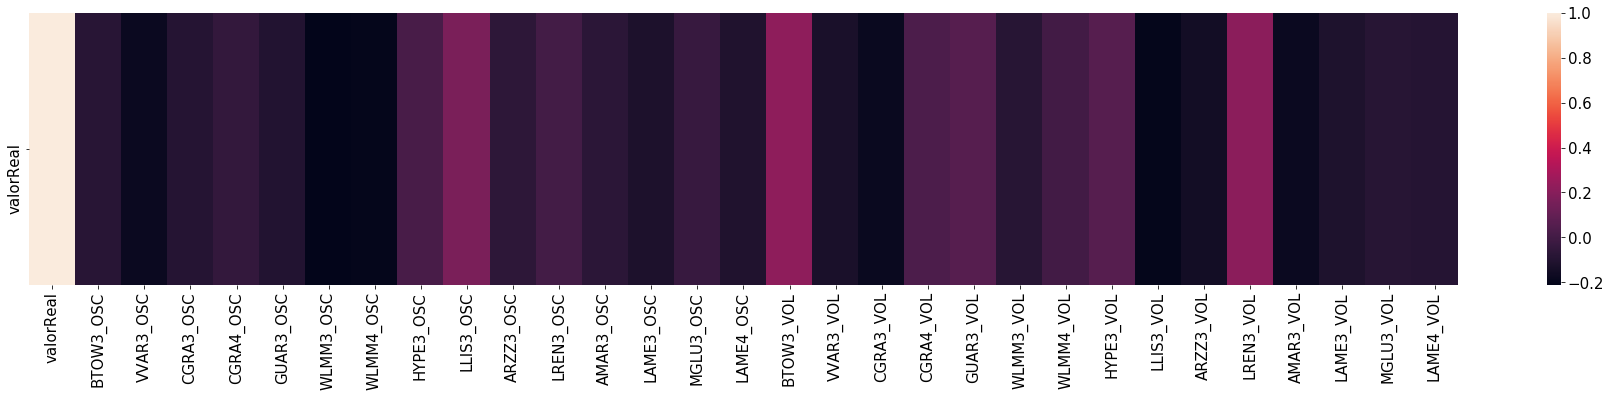

In [82]:
plt.figure(figsize=(32,5))
sns.heatmap( df_crr_w.corr()[:1] )
sns.set_style("whitegrid")
plt.show()

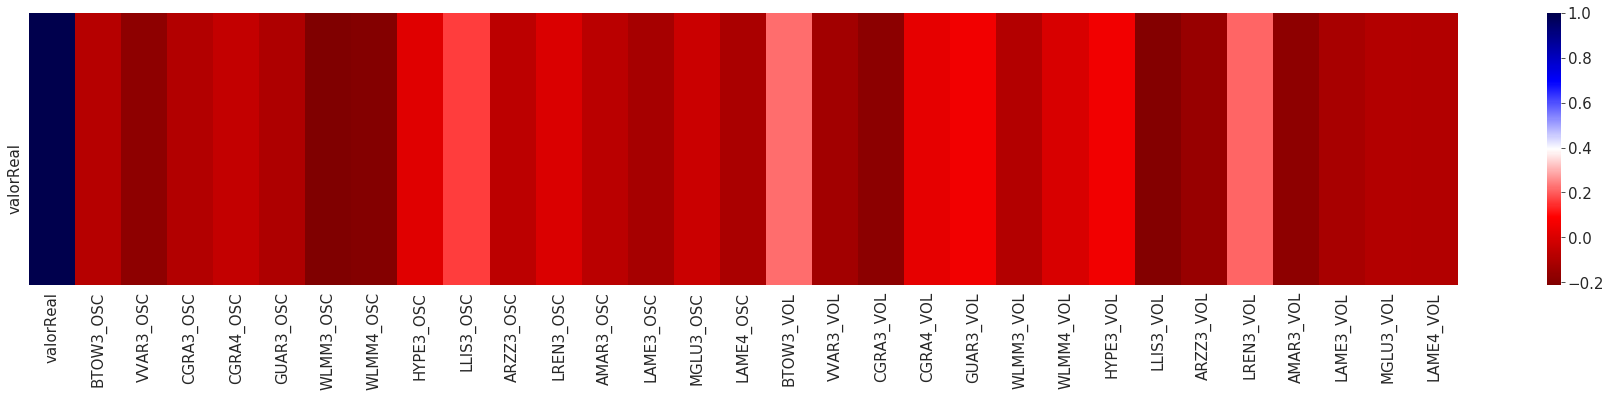

In [83]:
plt.figure(figsize=(32,5))
sns.heatmap( df_crr_w.corr()[:1], cmap='seismic_r' )
sns.set_style("whitegrid")
plt.show()

In [84]:
df_crr_w.corr()[:1]

,valorReal,BTOW3_OSC,VVAR3_OSC,CGRA3_OSC,CGRA4_OSC,GUAR3_OSC,WLMM3_OSC,WLMM4_OSC,HYPE3_OSC,LLIS3_OSC,...,WLMM3_VOL,WLMM4_VOL,HYPE3_VOL,LLIS3_VOL,ARZZ3_VOL,LREN3_VOL,AMAR3_VOL,LAME3_VOL,MGLU3_VOL,LAME4_VOL
valorReal,1.0,-0.079141,-0.177416,-0.091092,-0.049739,-0.098067,-0.210873,-0.197671,0.019483,0.166684,...,-0.084966,0.001566,0.062856,-0.197455,-0.150364,0.212297,-0.177322,-0.114748,-0.085549,-0.088347


### Correlação Mensal dos valores de ações de papeis de comercio na Bolsa Brasileira

In [85]:
df_ass_osc_vol_m.columns = columns_origin_m

In [86]:
df_crr_m = df_ass_osc_vol_m[columns_corr]

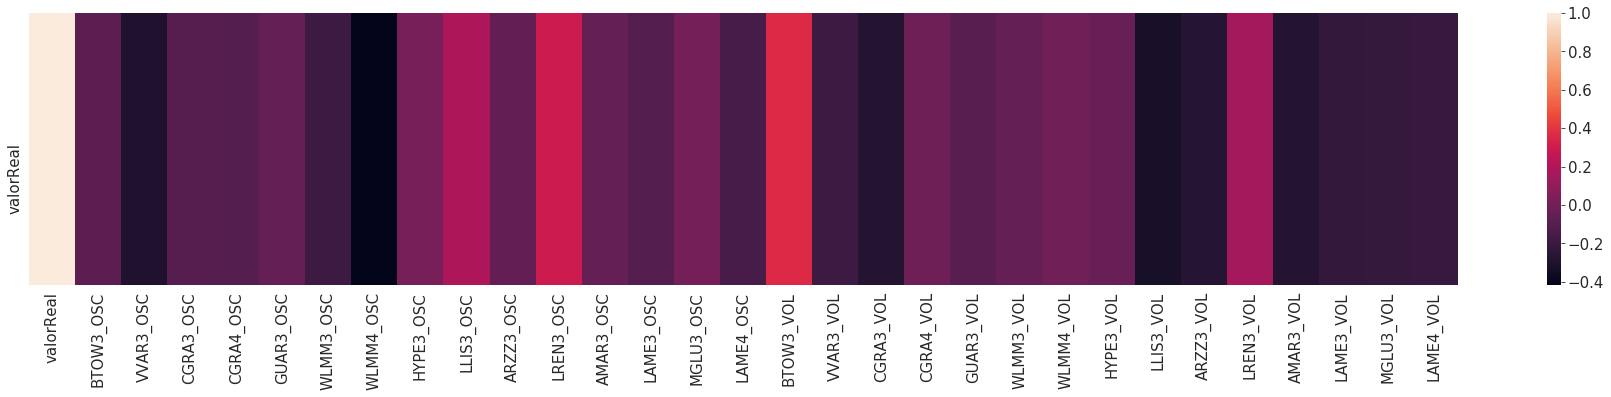

In [87]:
plt.figure(figsize=(32,5))
sns.heatmap( df_crr_m.corr()[:1] )
sns.set_style("whitegrid")
plt.show()

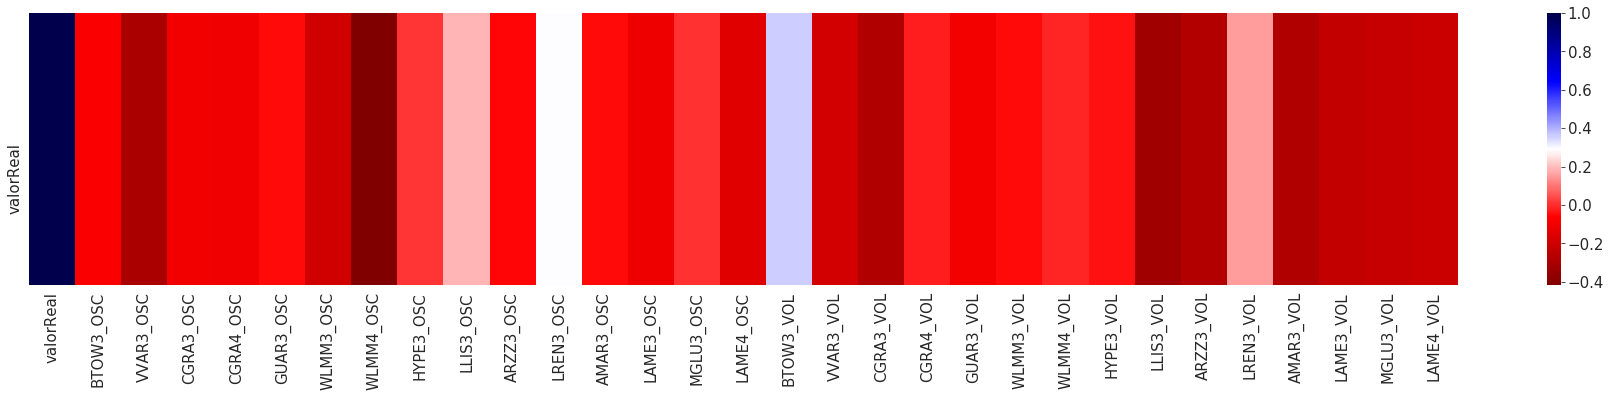

In [88]:

plt.figure(figsize=(32,5))
sns.heatmap( df_crr_m.corr()[:1], cmap='seismic_r' )
sns.set_style("whitegrid")
plt.show()

In [89]:
corr_va_osc_vol_m = df_crr_m.corr()[:1]
corr_va_osc_vol_m

,valorReal,BTOW3_OSC,VVAR3_OSC,CGRA3_OSC,CGRA4_OSC,GUAR3_OSC,WLMM3_OSC,WLMM4_OSC,HYPE3_OSC,LLIS3_OSC,...,WLMM3_VOL,WLMM4_VOL,HYPE3_VOL,LLIS3_VOL,ARZZ3_VOL,LREN3_VOL,AMAR3_VOL,LAME3_VOL,MGLU3_VOL,LAME4_VOL
valorReal,1.0,-0.075704,-0.298167,-0.09977,-0.100001,-0.044862,-0.193678,-0.414988,0.015753,0.189936,...,-0.047694,-0.007388,-0.034331,-0.323209,-0.271611,0.159401,-0.280063,-0.225235,-0.219653,-0.20836


# Merging of our dataset monthly with Dólar value and common gasoline

In [90]:
df_dol_m.head()

,Date,Último
1,2017-03-01,3.126491
2,2017-04-01,3.138250
3,2017-05-01,3.205922
4,2017-06-01,3.295968
5,2017-07-01,3.200395


In [91]:
df_dol_m['data'] = df_dol_m['Date'].dt.to_period('M')
df_dol_m.index = df_dol_m['data']
df_dol_m.drop(['data', 'Date'], axis=1, inplace=True)
df_dol_m.head()

,Último
data,
2017-03,3.126491
2017-04,3.138250
2017-05,3.205922
2017-06,3.295968
2017-07,3.200395


In [92]:
df_dol_m.tail()

,Último
data,
2018-01,3.212430
2018-02,3.248625
2018-03,3.279473
2018-04,3.409229
2018-05,3.631530


In [93]:
df_gas_m.head()

,PREÇO MÉDIO REVENDA,DESVIO PADRÃO REVENDA,PREÇO MÍNIMO REVENDA,PREÇO MÁXIMO REVENDA,PREÇO MÉDIO DISTRIBUIÇÃO,DESVIO PADRÃO DISTRIBUIÇÃO,PREÇO MÍNIMO DISTRIBUIÇÃO,PREÇO MÁXIMO DISTRIBUIÇÃO,Date
0,4.445,0.097,4.230,4.690,3.922,0.048,3.783,4.139,NaT
1,4.206,0.092,3.899,4.500,3.819,0.069,3.587,3.961,2017-03-01
2,4.184,0.218,3.842,4.599,3.788,0.084,3.490,3.972,2017-04-01
3,4.568,0.041,4.079,4.620,3.918,0.093,3.565,4.150,2017-05-01
4,4.687,0.094,4.170,4.799,4.075,0.090,3.869,4.317,2017-06-01


In [94]:
df_gas_m['data'] = df_gas_m['Date'].dt.to_period('M')
df_gas_m.index = df_gas_m['data']
df_gas_m.drop(['data', 'Date'], axis=1, inplace=True)
df_gas_m.head()

,PREÇO MÉDIO REVENDA,DESVIO PADRÃO REVENDA,PREÇO MÍNIMO REVENDA,PREÇO MÁXIMO REVENDA,PREÇO MÉDIO DISTRIBUIÇÃO,DESVIO PADRÃO DISTRIBUIÇÃO,PREÇO MÍNIMO DISTRIBUIÇÃO,PREÇO MÁXIMO DISTRIBUIÇÃO
data,,,,,,,,
NaT,4.445,0.097,4.230,4.690,3.922,0.048,3.783,4.139
2017-03,4.206,0.092,3.899,4.500,3.819,0.069,3.587,3.961
2017-04,4.184,0.218,3.842,4.599,3.788,0.084,3.490,3.972
2017-05,4.568,0.041,4.079,4.620,3.918,0.093,3.565,4.150
2017-06,4.687,0.094,4.170,4.799,4.075,0.090,3.869,4.317


In [95]:
df_gas_m.tail()

,PREÇO MÉDIO REVENDA,DESVIO PADRÃO REVENDA,PREÇO MÍNIMO REVENDA,PREÇO MÁXIMO REVENDA,PREÇO MÉDIO DISTRIBUIÇÃO,DESVIO PADRÃO DISTRIBUIÇÃO,PREÇO MÍNIMO DISTRIBUIÇÃO,PREÇO MÁXIMO DISTRIBUIÇÃO
data,,,,,,,,
2017-12,4.572,0.109,4.190,4.890,4.100,0.057,3.789,4.268
2018-01,4.375,0.125,4.150,4.699,4.079,0.047,3.948,4.210
2018-02,4.644,0.096,4.190,4.799,4.187,0.067,4.018,4.353
2018-03,4.679,0.025,4.390,4.799,4.220,0.060,4.042,4.421
2018-04,4.657,0.040,4.539,4.890,4.135,0.064,3.905,4.410


In [96]:
print("Assinante: ", len(df_by_month), 
      " - Valor Dólar: ", len(df_dol_m), 
      " - Gasolina média Fortaleza: ", len(df_gas_m))

Assinante:  38  - Valor Dólar:  15  - Gasolina média Fortaleza:  15


In [97]:
df_ass_gas_dol_m = pd.concat( [df_by_month, df_dol_m , df_gas_m], sort=False, axis=1)
df_ass_gas_dol_m.head()

,valorReal,mes,Último,PREÇO MÉDIO REVENDA,DESVIO PADRÃO REVENDA,PREÇO MÍNIMO REVENDA,PREÇO MÁXIMO REVENDA,PREÇO MÉDIO DISTRIBUIÇÃO,DESVIO PADRÃO DISTRIBUIÇÃO,PREÇO MÍNIMO DISTRIBUIÇÃO,PREÇO MÁXIMO DISTRIBUIÇÃO
data,,,,,,,,,,,
NaT,NaN,NaN,NaN,4.445,0.097,4.230,4.690,3.922,0.048,3.783,4.139
2017-01,1904785.30,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2017-02,1878276.29,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2017-03,1895962.97,3.0,3.126491,4.206,0.092,3.899,4.500,3.819,0.069,3.587,3.961
2017-04,2103872.48,4.0,3.138250,4.184,0.218,3.842,4.599,3.788,0.084,3.490,3.972


In [98]:
df_ass_gas_dol_m = df_ass_gas_dol_m.dropna()
#df_ass_gas_dol_m = df_ass_gas_dol_m.reset_index(drop=True)

In [99]:
df_ass_gas_dol_m.tail()

,valorReal,mes,Último,PREÇO MÉDIO REVENDA,DESVIO PADRÃO REVENDA,PREÇO MÍNIMO REVENDA,PREÇO MÁXIMO REVENDA,PREÇO MÉDIO DISTRIBUIÇÃO,DESVIO PADRÃO DISTRIBUIÇÃO,PREÇO MÍNIMO DISTRIBUIÇÃO,PREÇO MÁXIMO DISTRIBUIÇÃO
data,,,,,,,,,,,
2017-12,2487769.24,12.0,3.296857,4.572,0.109,4.190,4.890,4.100,0.057,3.789,4.268
2018-01,1694897.79,1.0,3.212430,4.375,0.125,4.150,4.699,4.079,0.047,3.948,4.210
2018-02,1686678.07,2.0,3.248625,4.644,0.096,4.190,4.799,4.187,0.067,4.018,4.353
2018-03,2285031.68,3.0,3.279473,4.679,0.025,4.390,4.799,4.220,0.060,4.042,4.421
2018-04,2235148.89,4.0,3.409229,4.657,0.040,4.539,4.890,4.135,0.064,3.905,4.410


## Correlation visualization

In [100]:
df_ass_gas_dol_m.columns = ['valorReal', 'mes', 'Dólar', 'PREÇO MÉDIO REVENDA',
       'DESVIO PADRÃO REVENDA', 'PREÇO MÍNIMO REVENDA', 'PREÇO MÁXIMO REVENDA',
       'PREÇO MÉDIO DISTRIBUIÇÃO', 'DESVIO PADRÃO DISTRIBUIÇÃO',
       'PREÇO MÍNIMO DISTRIBUIÇÃO', 'PREÇO MÁXIMO DISTRIBUIÇÃO']

In [101]:
df_ass_gas_dol_m_corr = df_ass_gas_dol_m.drop(['mes'], axis=1)

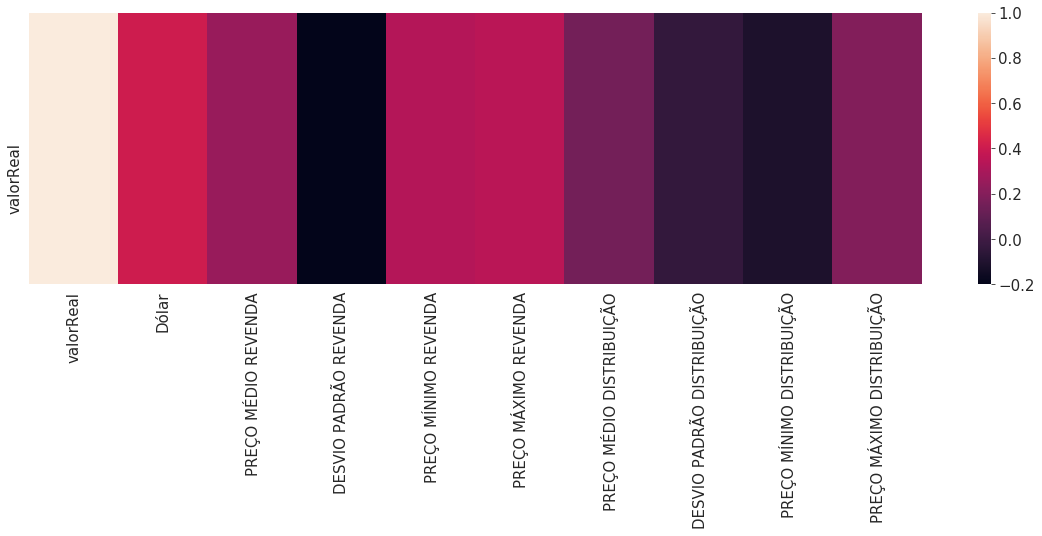

In [102]:
plt.figure(figsize=(20,5))
sns.heatmap(df_ass_gas_dol_m_corr.corr()[:1] )
sns.set_style("whitegrid")
plt.show()

In [103]:
df_ass_gas_dol_m_corr = df_ass_gas_dol_m_corr.corr()[:1] 
df_ass_gas_dol_m_corr

,valorReal,Dólar,PREÇO MÉDIO REVENDA,DESVIO PADRÃO REVENDA,PREÇO MÍNIMO REVENDA,PREÇO MÁXIMO REVENDA,PREÇO MÉDIO DISTRIBUIÇÃO,DESVIO PADRÃO DISTRIBUIÇÃO,PREÇO MÍNIMO DISTRIBUIÇÃO,PREÇO MÁXIMO DISTRIBUIÇÃO
valorReal,1.0,0.405363,0.257623,-0.200565,0.332582,0.35256,0.151478,-0.037852,-0.106878,0.195712


## Feature >50% correlation (Month)

In [104]:
df_ass_gas_dol_m_corr

,valorReal,Dólar,PREÇO MÉDIO REVENDA,DESVIO PADRÃO REVENDA,PREÇO MÍNIMO REVENDA,PREÇO MÁXIMO REVENDA,PREÇO MÉDIO DISTRIBUIÇÃO,DESVIO PADRÃO DISTRIBUIÇÃO,PREÇO MÍNIMO DISTRIBUIÇÃO,PREÇO MÁXIMO DISTRIBUIÇÃO
valorReal,1.0,0.405363,0.257623,-0.200565,0.332582,0.35256,0.151478,-0.037852,-0.106878,0.195712


In [105]:
corr_va_feat = pd.concat( [df_ass_gas_dol_m_corr, corr_va_osc_vol_m], sort=False, axis=1)
corr_va_feat.head()

,valorReal,Dólar,PREÇO MÉDIO REVENDA,DESVIO PADRÃO REVENDA,PREÇO MÍNIMO REVENDA,PREÇO MÁXIMO REVENDA,PREÇO MÉDIO DISTRIBUIÇÃO,DESVIO PADRÃO DISTRIBUIÇÃO,PREÇO MÍNIMO DISTRIBUIÇÃO,PREÇO MÁXIMO DISTRIBUIÇÃO,...,WLMM3_VOL,WLMM4_VOL,HYPE3_VOL,LLIS3_VOL,ARZZ3_VOL,LREN3_VOL,AMAR3_VOL,LAME3_VOL,MGLU3_VOL,LAME4_VOL
valorReal,1.0,0.405363,0.257623,-0.200565,0.332582,0.35256,0.151478,-0.037852,-0.106878,0.195712,...,-0.047694,-0.007388,-0.034331,-0.323209,-0.271611,0.159401,-0.280063,-0.225235,-0.219653,-0.20836


In [106]:
corr_va_feat_T = corr_va_feat.transpose()

In [107]:
corr_va_feat_T.tail()

,valorReal
LREN3_VOL,0.159401
AMAR3_VOL,-0.280063
LAME3_VOL,-0.225235
MGLU3_VOL,-0.219653
LAME4_VOL,-0.208360


In [108]:
features = list(corr_va_feat_T[((corr_va_feat_T['valorReal'] >= 0.5) & (corr_va_feat_T['valorReal'] < 1))
                               |(corr_va_feat_T['valorReal'] <= -0.5)].index)

In [109]:
df_res = pd.concat([df_by_month, df_ass_gas_dol_m, df_ass_osc_vol_m], sort=False, axis=1)[features]
df_res = pd.concat([df_by_month, df_res], sort=False, axis=1)
df_res.head()

,valorReal,mes
data,,
2017-01,1904785.30,1
2017-02,1878276.29,2
2017-03,1895962.97,3
2017-04,2103872.48,4
2017-05,1941807.41,5


In [110]:
df_res.tail()

,valorReal,mes
data,,
2019-10,2155817.78,10
2019-11,1570817.25,11
2019-12,2447731.68,12
2020-01,1999869.83,1
2020-02,1262192.45,2


In [111]:
path_pred = '../../../data/pred/'
name_dataset = 'df_to_pred.csv'

df_res.to_csv(path_pred + name_dataset)